# Lession 12 - L2 Regularization

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras import regularizers
from matplotlib.pyplot import plot
%matplotlib inline

C:\Users\yoder\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
notMNIST = np.load('../data/notMNIST_train_100.npz')
notMNIST.keys()
images = notMNIST['train_images']
labels = notMNIST['train_labels']

label_names = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
pd.Series(label_names[notMNIST['train_labels']]).value_counts()

D    20
G    14
J    14
I    12
E     9
A     8
C     7
H     7
B     5
F     4
dtype: int64

In [3]:
images.shape

(100, 28, 28)

In [4]:
X = images.reshape(100, 28*28)
X.shape

(100, 784)

In [5]:
X.max()

0.5

In [6]:
X.min()

-0.5

No need to rescale

In [7]:
P = pd.get_dummies(labels).values
P

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0,

In [8]:
# Keras
model = Sequential()
model.add(Dense(10, input_shape=(28*28,), kernel_regularizer=regularizers.l2(100)))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

hist = model.fit(X, P, validation_split=0.2, epochs=100, verbose=0)

In [9]:
28*28

784

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


7850 parameters and only 100 images.  Overtraining

In [11]:
accuracy = pd.DataFrame()
accuracy['epoch']     = hist.epoch
accuracy['epoch']     = accuracy['epoch'] + 1
accuracy['training']  = hist.history['acc']
accuracy['testing']   = hist.history['val_acc']
accuracy['baseline']  = 0.1
accuracy.head()

epoch  training  testing  baseline
0      1    0.0750      0.1       0.1
1      2    0.0625      0.1       0.1
2      3    0.0625      0.1       0.1
3      4    0.0625      0.1       0.1
4      5    0.0625      0.1       0.1

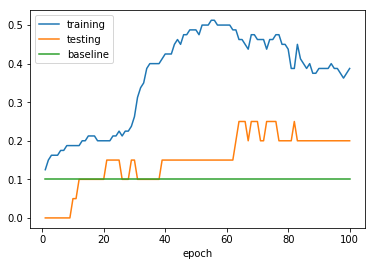

In [14]:
ax = accuracy.plot.line(x='epoch', y='training')
ax = accuracy.plot.line(x='epoch', y='testing', ax=ax)
accuracy.plot.line(x='epoch', y='baseline', ax=ax)